The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

Challenge: To build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).¶

In [ ]:
import pandas as pd
Train_T = pd.read_csv(r'C:\Users\George\Downloads\Titanic\train.csv')
Train_T

In [141]:
import pandas as pd
Test_T = pd.read_csv(r'C:\Users\George\Downloads\Titanic\test.csv')
Test_T

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [142]:
Train_T.info()
Test_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [143]:
Train_T.describe()
Test_T.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [144]:
# dropping columns; passegerid, cabin, ticket
Train_T.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

Test_T.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

Train_T, Test_T

(     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 ..        ...     ...                                                ...   
 886         0       2                              Montvila, Rev. Juozas   
 887         1       1                       Graham, Miss. Margaret Edith   
 888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
 889         1       1                              Behr, Mr. Karl Howell   
 890         0       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     Fare Embarked  
 0      male  22.0   

In [145]:
# Split the title from the names as social status may be a parameter in predicting survival
Train_T["Title"]= Train_T['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Test_T['Title']= Test_T['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
     
Train_T
Test_T

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,Mr


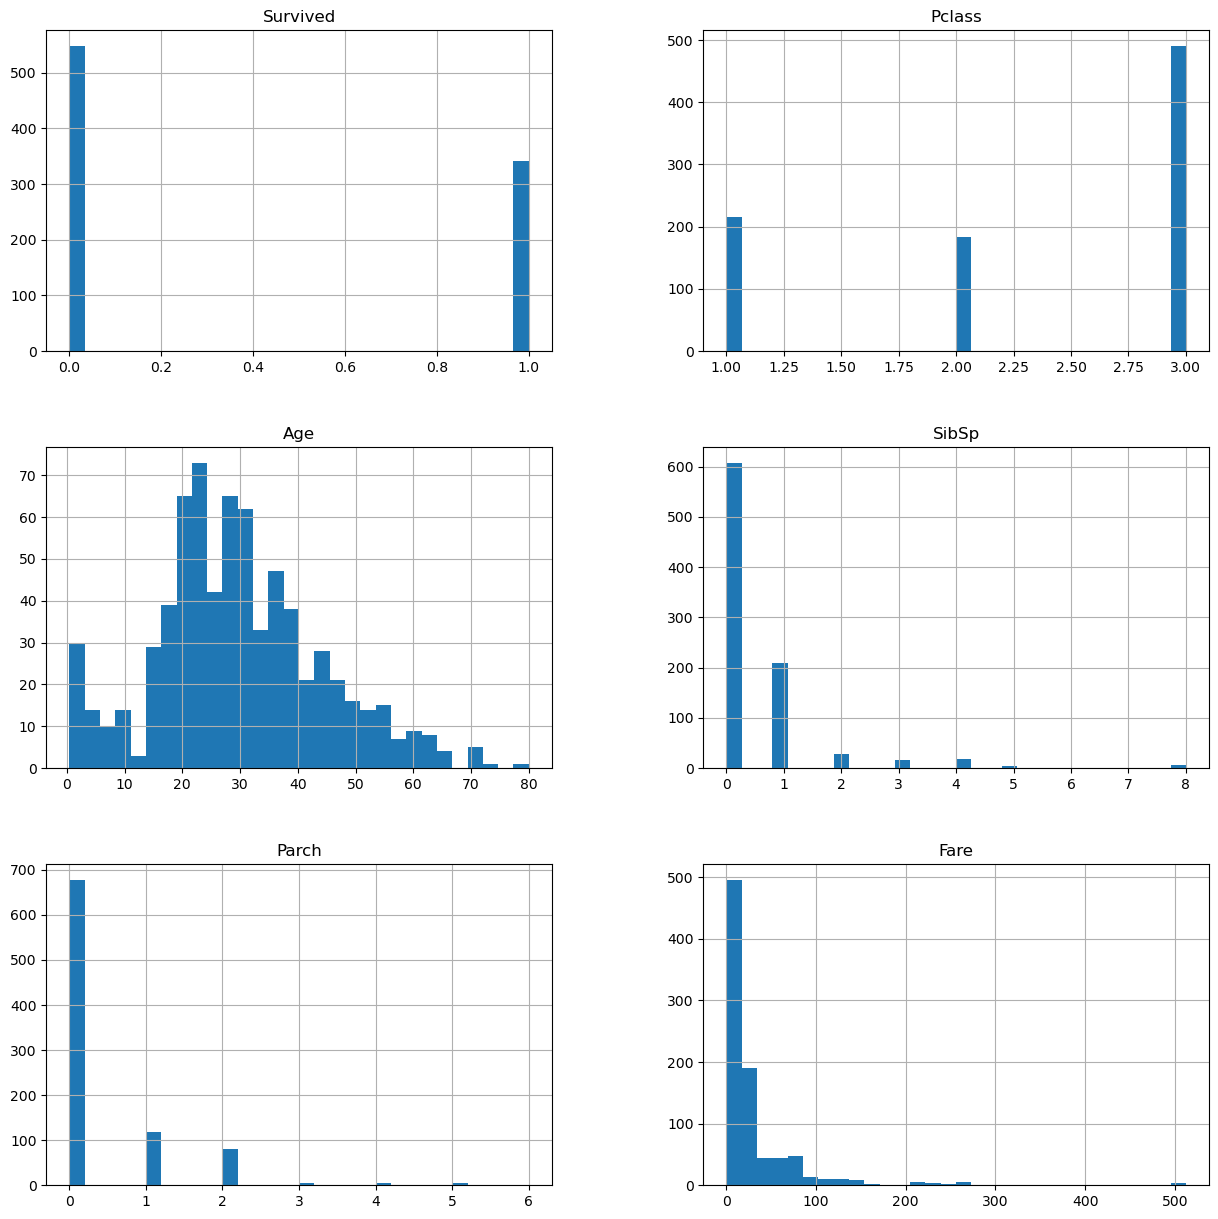

In [146]:
# Exploring 'Age' and Fare 'Fare'columns, notice they're right-skewed and the median will be just appropriate 
# to replace missing values as it is maintains the natural distribution and is not affected by extreme values.  
import matplotlib.pyplot as plt
Train_T.hist(bins = 30, figsize=(15,15))
plt.show()

In [147]:
#fill missing values with the median and mode as required, for 'Age' and 'Fare' 
#because the median is not affected by extreme values and is best for right skewed datas. 
#The 'Embarked' column is categorical and the mode is best to replace missing value based on frequency.

Train_T['Age'].fillna(Train_T["Age"].median(), inplace=True)
Test_T['Age'].fillna(Train_T["Age"].median(), inplace=True)
Train_T['Embarked'].fillna(Train_T["Embarked"].mode()[0], inplace=True)
Test_T['Embarked'].fillna(Train_T["Embarked"].mode()[0], inplace=True)
Train_T['Fare'].fillna(Train_T['Fare'].median(), inplace=True)
Test_T['Fare'].fillna(Test_T['Fare'].median(), inplace=True)
Train_T
Test_T

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Dona
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr
416,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,Mr


In [148]:
# transformed categorical data into numerical data using label encoder
from sklearn.preprocessing import LabelEncoder
Train_T['Sex'] = LabelEncoder().fit_transform(Train_T['Sex'])
Test_T['Sex']  = LabelEncoder().fit_transform(Test_T['Sex'])
Train_T['Embarked']= LabelEncoder().fit_transform(Train_T['Embarked'])
Test_T['Embarked']= LabelEncoder().fit_transform(Test_T['Embarked'])
Train_T
Test_T

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,Mrs
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,Mr
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,2,Mr
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0,Dona
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2,Mr
416,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,2,Mr


In [149]:
freq_encoding = Train_T['Title'].value_counts().to_dict()
Train_T['Title'] = Train_T['Title'].map(freq_encoding)

Train_T['Title'] 

0      517
1      125
2      182
3      125
4      517
      ... 
886      6
887    182
888    182
889    517
890    517
Name: Title, Length: 891, dtype: int64

In [150]:
freq_encoding = Test_T['Title'].value_counts().to_dict()
Test_T['Title'] = Test_T['Title'].map(freq_encoding)

Test_T['Title']

0      240
1       72
2      240
3      240
4       72
      ... 
413    240
414      1
415    240
416    240
417     21
Name: Title, Length: 418, dtype: int64

In [151]:
# hadled missing values in both dataset using the logarithmic function as it suits right skewed data
import numpy as np

Train_T['Age']= np.log1p(Train_T['Age'])
Test_T['Age']=np.log1p(Test_T['Age'])
Train_T['Fare']= np.log1p(Train_T['Fare'])
Test_T['Fare']= np.log1p(Test_T['Fare'])
Train_T.drop(['Title'], axis=1, inplace=False)
Test_T.drop(['Title'], axis=1, inplace=False)
Train_T
Test_T

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",1,3.569533,0,0,2.178064,1,240
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,3.871201,1,0,2.079442,2,72
2,2,"Myles, Mr. Thomas Francis",1,4.143135,0,0,2.369075,1,240
3,3,"Wirz, Mr. Albert",1,3.332205,0,0,2.268252,2,240
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,3.135494,1,1,2.586824,2,72
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,3.367296,0,0,2.202765,2,240
414,1,"Oliva y Ocana, Dona. Fermina",0,3.688879,0,0,4.699571,0,1
415,3,"Saether, Mr. Simon Sivertsen",1,3.676301,0,0,2.110213,2,240
416,3,"Ware, Mr. Frederick",1,3.367296,0,0,2.202765,2,240


In [152]:
Test_T.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [153]:
X= Train_T.drop(['Survived', 'Name'], axis=1)
Y= Train_T['Survived']

In [154]:
# fitting the dataset into a model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_Train_T, X_val, Y_Train_T, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 100, random_state=42)

model.fit(X_Train_T, Y_Train_T)

Y_pred = model.predict(X_val)

Y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [118]:
Train_Acc = accuracy_score(Y_val, Y_pred)
Train_Acc

0.8379888268156425

In [119]:
Test_pred = model.predict(Test_T.drop(['Name'], axis=1))
Test_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [155]:
# Applying cross validation function 
from sklearn.model_selection import cross_val_score

X_Train_T, X_val, Y_Train_T, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 100, random_state=42)

scores = cross_val_score(model, X_Train_T, Y_Train_T, cv=5, scoring="accuracy")
scores

array([0.8041958 , 0.79020979, 0.8028169 , 0.79577465, 0.82394366])

In [156]:
mean_score = np.mean(scores)
mean_score


0.8033881611346401